#### Fonte Kaggle:https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

## Importando e exibindo a base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('T1.csv')
display(df)
print(df.shape)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


(50530, 5)


## Tratamento dos dados

In [3]:
df.columns = ['Data/hora', 'Energia Produzida (kW)', 'Velocidade do Vento (m/s)', 'Curva teórica', 'Direção do vento(°)']
df['Data/hora'] = pd.to_datetime(df['Data/hora'])
pd.options.display.float_format = '{:.2f}'.format
df['Mês'] = pd.Series(df['Data/hora']).dt.month
df['Hora'] = pd.Series(df['Data/hora']).dt.hour

display(df.head())

,Data/hora,Energia Produzida (kW),Velocidade do Vento (m/s),Curva teórica,Direção do vento(°),Mês,Hora
0,2018-01-01 00:00:00,380.05,5.31,416.33,259.99,1,0
1,2018-01-01 00:10:00,453.77,5.67,519.92,268.64,1,0
2,2018-01-01 00:20:00,306.38,5.22,390.90,272.56,1,0
3,2018-01-01 00:30:00,419.65,5.66,516.13,271.26,1,0
4,2018-01-01 00:40:00,380.65,5.58,491.70,265.67,1,0


### Verificação de valores nulos 

In [4]:
df.isnull().sum()

Data/hora                    0
Energia Produzida (kW)       0
Velocidade do Vento (m/s)    0
Curva teórica                0
Direção do vento(°)          0
Mês                          0
Hora                         0
dtype: int64

In [5]:
display(df.apply(lambda x: x.dtype))

Data/hora                    datetime64[ns]
Energia Produzida (kW)              float64
Velocidade do Vento (m/s)           float64
Curva teórica                       float64
Direção do vento(°)                 float64
Mês                                   int64
Hora                                  int64
dtype: object

### Estatísticas e distribuições dos dados

In [6]:
df.describe()

,Energia Produzida (kW),Velocidade do Vento (m/s),Curva teórica,Direção do vento(°),Mês,Hora
count,50530.00,50530.00,50530.00,50530.00,50530.00,50530.00
mean,1307.68,7.56,1492.18,123.69,6.57,11.52
std,1312.46,4.23,1368.02,93.44,3.40,6.93
min,-2.47,0.00,0.00,0.00,1.00,0.00
25%,50.68,4.20,161.33,49.32,4.00,5.00
50%,825.84,7.10,1063.78,73.71,7.00,12.00
75%,2482.51,10.30,2964.97,201.70,10.00,18.00
max,3618.73,25.21,3600.00,360.00,12.00,23.00


In [7]:
matrix = df.iloc[:,:5].corr()
display(matrix)

,Energia Produzida (kW),Velocidade do Vento (m/s),Curva teórica,Direção do vento(°)
Energia Produzida (kW),1.00,0.91,0.95,-0.06
Velocidade do Vento (m/s),0.91,1.00,0.94,-0.08
Curva teórica,0.95,0.94,1.00,-0.10
Direção do vento(°),-0.06,-0.08,-0.10,1.00


#### Matriz de scatterplots

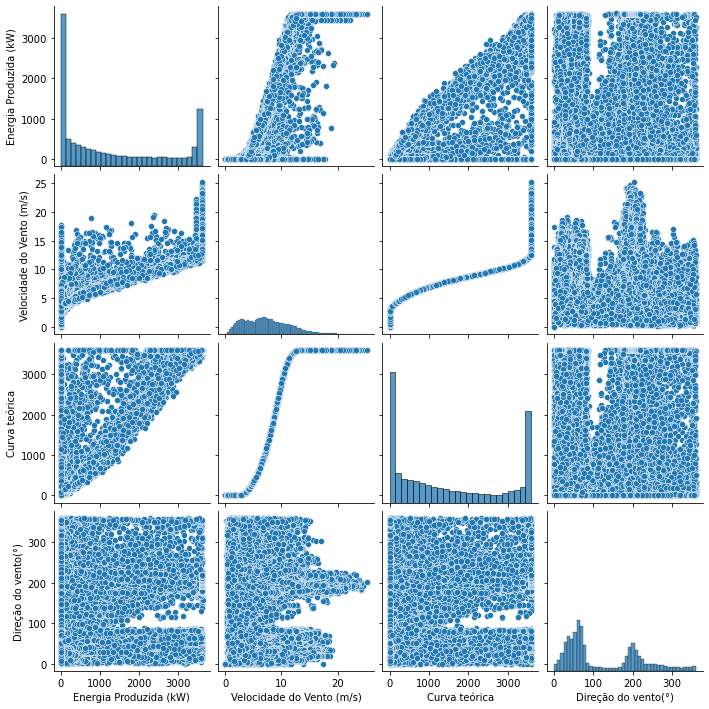

In [8]:
sns.pairplot(df.iloc[:,:5])
plt.show()

### Análise da média de energia produzida

#### Média geral

In [9]:
mediageral = df['Energia Produzida (kW)'].mean()
print(f'Média geral de produção de energia {mediageral:.2f}')

Média geral de produção de energia 1307.68


#### Por Mês

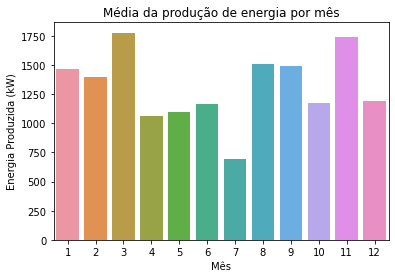

In [10]:
mensal = df[['Mês', 'Energia Produzida (kW)']].groupby('Mês').mean('Energia Produzida (kW)')
graf = sns.barplot(x=mensal.index, y=mensal['Energia Produzida (kW)'], data=mensal)
plt.title('Média da produção de energia por mês')
graf.figure.savefig('mediames.jpg', dpi=300, orientation="landscape")
plt.show()

#### Por Hora

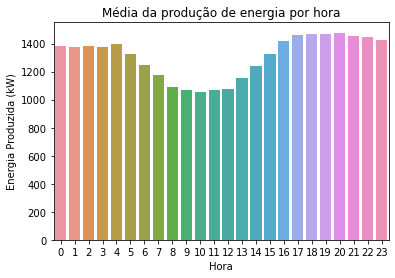

In [11]:
horario = df[['Hora', 'Energia Produzida (kW)']].groupby('Hora').mean('Energia Produzida (kW)')
graf2 = sns.barplot(x=horario.index, y=horario['Energia Produzida (kW)'], data=horario)
plt.title('Média da produção de energia por hora')
graf2.figure.savefig('mediahora.jpg', dpi=300, orientation="landscape")
plt.show()

#### Por velocidade do vento

In [12]:
velocidade_do_vento = []
media_energia = []

for i in [0,5,10,15,20]:
    valor = df.loc[(df['Velocidade do Vento (m/s)'] > i) & 
                                                (df['Velocidade do Vento (m/s)'] <= i+5)]\
                                                .agg({'Energia Produzida (kW)':'mean'})
    media_energia.append(valor)
    velocidade_do_vento.append(str(i) + '-' + str(i+5))
df_2 = pd.DataFrame(media_energia, index=[0,1,2,3,4])
df_3 = pd.DataFrame(velocidade_do_vento)
df_2['Vento'] = df_3
display(df_2)


,Energia Produzida (kW),Vento
0,50.07,0-5
1,1082.35,5-10
2,3014.42,10-15
3,3495.15,15-20
4,3571.33,20-25


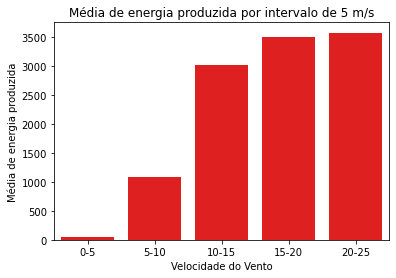

In [13]:
graf3 = sns.barplot(data=df_2, x=df_2['Vento'], y=df_2['Energia Produzida (kW)'], color='red')
plt.title('Média de energia produzida por intervalo de 5 m/s')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Média de energia produzida')
graf3.figure.savefig('histogramavento.jpg', dpi=300, orientation="landscape")
plt.show()

### Direção do Vento

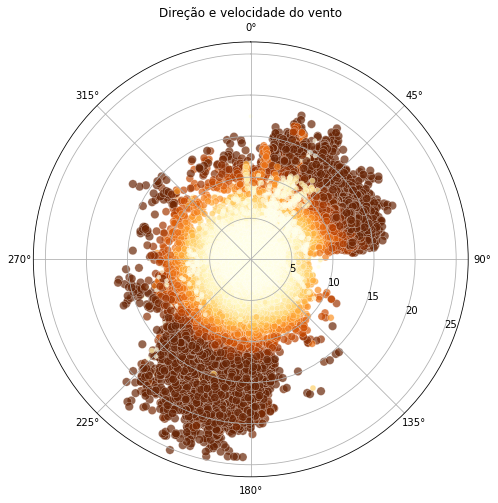

In [14]:
from math import radians

plt.figure(figsize=(8,8))
vento_dir = plt.subplot(polar=True)
# Inside circles are the wind speed and marker color and size represents the amount of power production
graf4 = sns.scatterplot(x=[radians(x) for x in df['Direção do vento(°)']], 
                y=df['Velocidade do Vento (m/s)'],
                size=df['Energia Produzida (kW)'],
                hue=df['Energia Produzida (kW)'],
                alpha=0.7, legend=None, palette="YlOrBr")
# Setting the polar diagram's top represents the North 
vento_dir.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
vento_dir.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
vento_dir.set_rlabel_position(110)
plt.title('Direção e velocidade do vento')
plt.ylabel(None)
graf4.figure.savefig('direcaodovento.jpg', dpi=300, orientation="landscape")
plt.show()

## Curva Teorica

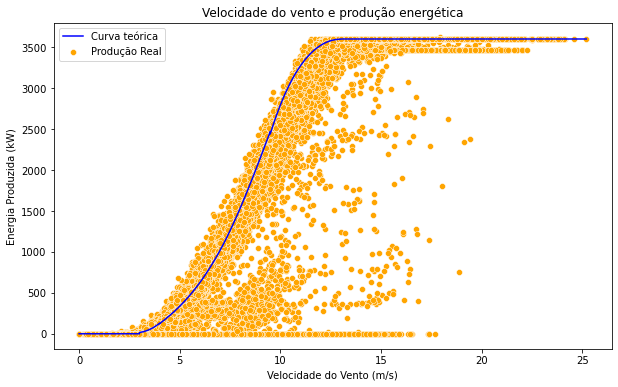

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Velocidade do Vento (m/s)', y='Energia Produzida (kW)', color='orange', label='Produção Real', data=df)
sns.lineplot(x='Velocidade do Vento (m/s)', y='Curva teórica', color='blue', label='Curva teórica', data=df)
plt.title('Velocidade do vento e produção energética')
plt.savefig('realxteorico.jpg', dpi=300, orientation="landscape")
plt.show()

### Limites (5 e 10%)

In [16]:
potencia_real= df['Energia Produzida (kW)'].tolist()
potencia_teorica = df['Curva teórica'].tolist()
pot_max=[]
pot_min=[]
pot_max10=[]
pot_min10=[]
dentro_limite = []
dentro_limite10 = []
# 5% de limite

for potencia in potencia_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

# 10% de limite
for potencia in potencia_teorica:
    pot_max10.append(potencia*1.1)
    pot_min10.append(potencia*0.9)

for p, potencia in enumerate(potencia_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
        
for p, potencia in enumerate(potencia_real):
    if potencia>=pot_min10[p] and potencia<=pot_max10[p]:
        dentro_limite10.append('Dentro')
    elif potencia==0:
        dentro_limite10.append('Zero')
    else:
        dentro_limite10.append('Fora')

#### Adicionando limites ao dataframe:

In [17]:
df['Limite 5%'] = dentro_limite
df['Limite 10%'] = dentro_limite10
display(df)

,Data/hora,Energia Produzida (kW),Velocidade do Vento (m/s),Curva teórica,Direção do vento(°),Mês,Hora,Limite 5%,Limite 10%
0,2018-01-01 00:00:00,380.05,5.31,416.33,259.99,1,0,Fora,Dentro
1,2018-01-01 00:10:00,453.77,5.67,519.92,268.64,1,0,Fora,Fora
2,2018-01-01 00:20:00,306.38,5.22,390.90,272.56,1,0,Fora,Fora
3,2018-01-01 00:30:00,419.65,5.66,516.13,271.26,1,0,Fora,Fora
4,2018-01-01 00:40:00,380.65,5.58,491.70,265.67,1,0,Fora,Fora
...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.98,11.40,3397.19,80.50,12,23,Fora,Fora
50526,2018-12-31 23:20:00,1684.35,7.33,1173.06,84.06,12,23,Fora,Fora
50527,2018-12-31 23:30:00,2201.11,8.44,1788.28,84.74,12,23,Fora,Fora
50528,2018-12-31 23:40:00,2515.69,9.42,2418.38,84.30,12,23,Dentro,Dentro


#### Curva dentro do limite 5%

Percentual de dentro do limite de 5%: 37%


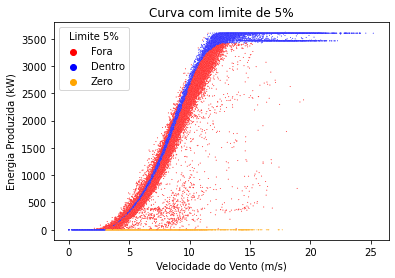

In [18]:
cores={'Dentro':'blue','Fora':'red','Zero':'orange'}
graf7=sns.scatterplot(data=df, x='Velocidade do Vento (m/s)', y='Energia Produzida (kW)',hue='Limite 5%', s=1,palette=cores)
plt.title('Curva com limite de 5%')
graf7.figure.savefig('lmite5.jpg', dpi=300, orientation="landscape")
p_dentro=dentro_limite.count('Dentro')/len(dentro_limite)
print(f'Percentual de dentro do limite de 5%: {p_dentro:.0%}')

#### Curva dentro do limite 10%

Percentual de dentro do limite de 10%: 51%


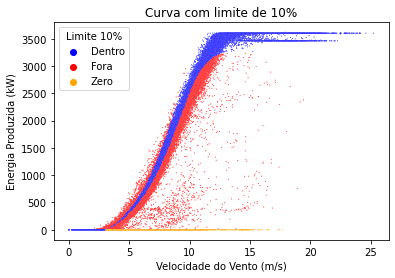

In [19]:
cores = {'Dentro':'blue','Fora':'red','Zero':'orange'}
graf8 = sns.scatterplot(data=df, x='Velocidade do Vento (m/s)', y='Energia Produzida (kW)',hue='Limite 10%', s=1,palette=cores)
plt.title('Curva com limite de 10%')
graf8.figure.savefig('lmite10.jpg', dpi=300, orientation="landscape")
p_dentro10 = dentro_limite10.count('Dentro')/len(dentro_limite10)
print(f'Percentual de dentro do limite de 10%: {p_dentro10:.0%}')

### Limiar para iniciar a geração de energia

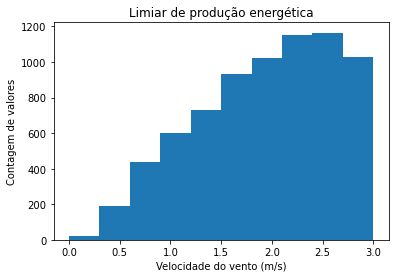

In [20]:
zero_energia_teo = df.loc[(df['Energia Produzida (kW)'] ==0) &
                      (df['Curva teórica'] <= 0)]

graf8 = zero_energia_teo['Velocidade do Vento (m/s)'].plot.hist()
plt.title('Limiar de produção energética')
plt.xlabel('Velocidade do vento (m/s)')
plt.ylabel('Contagem de valores')
graf8.figure.savefig('distprod0.jpg', dpi=300, orientation="landscape")
plt.show()

#### Periodos de geração zero mesmo com vento elevado

A quantidade de observações foi de 3497


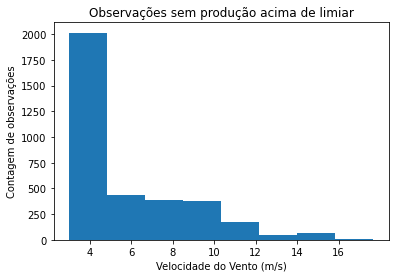

In [21]:
zero_energia = df.loc[(df['Energia Produzida (kW)'] == 0) &
                      (df['Curva teórica'] != 0) &
                     (df['Velocidade do Vento (m/s)'] > 3)]

print(f'A quantidade de observações foi de {zero_energia.shape[0]}')
graf9 = zero_energia['Velocidade do Vento (m/s)'].plot.hist(bins=8)
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Contagem de observações')
plt.title('Observações sem produção acima de limiar')
plt.xticks(ticks=np.arange(4,18,2))
graf9.figure.savefig('velzero.jpg', dpi=300, orientation="landscape")
plt.show()

#### Contagem de valores zero com ventos elevados por mês

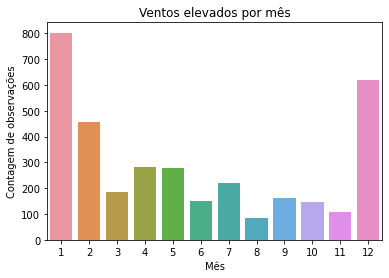

In [22]:
graf10 = sns.countplot(x=zero_energia['Mês'])
plt.title('Ventos elevados por mês')
plt.ylabel('Contagem de observações')
graf10.figure.savefig('ventoselevmes.jpg', dpi=300, orientation="landscape")
plt.show()

## Preparação Machine Learning

### Verificação de outliers

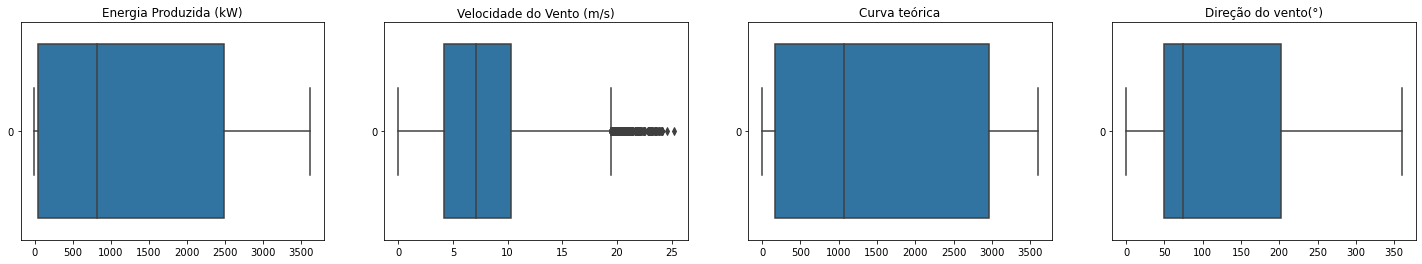

In [23]:
box1 = df.iloc[:, 1:5]
x=1
plt.figure(figsize=(25, 4))
for i in box1:
    a = box1[i]
    plt.subplot(1,4,x)
    sns.boxplot(data=a, orient='h')
    plt.title(i)
    x += 1

#### Remoção de outliers

In [25]:
Q1 = df['Velocidade do Vento (m/s)'].quantile(0.25)
Q3 = df['Velocidade do Vento (m/s)'].quantile(0.75)
IQR = Q3 - Q1
limitesup = round(Q3 + 1.5*IQR, 0)
display(limitesup)
outlier = df.loc[(df['Velocidade do Vento (m/s)']) > limitesup].index


19.0

,Data/hora,Energia Produzida (kW),Velocidade do Vento (m/s),Curva teórica,Direção do vento(°),Mês,Hora,Limite 5%,Limite 10%
0,2018-01-01 00:00:00,380.05,5.31,416.33,259.99,1,0,Fora,Dentro
1,2018-01-01 00:10:00,453.77,5.67,519.92,268.64,1,0,Fora,Fora
2,2018-01-01 00:20:00,306.38,5.22,390.90,272.56,1,0,Fora,Fora
3,2018-01-01 00:30:00,419.65,5.66,516.13,271.26,1,0,Fora,Fora
4,2018-01-01 00:40:00,380.65,5.58,491.70,265.67,1,0,Fora,Fora
...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.98,11.40,3397.19,80.50,12,23,Fora,Fora
50526,2018-12-31 23:20:00,1684.35,7.33,1173.06,84.06,12,23,Fora,Fora
50527,2018-12-31 23:30:00,2201.11,8.44,1788.28,84.74,12,23,Fora,Fora
50528,2018-12-31 23:40:00,2515.69,9.42,2418.38,84.30,12,23,Dentro,Dentro


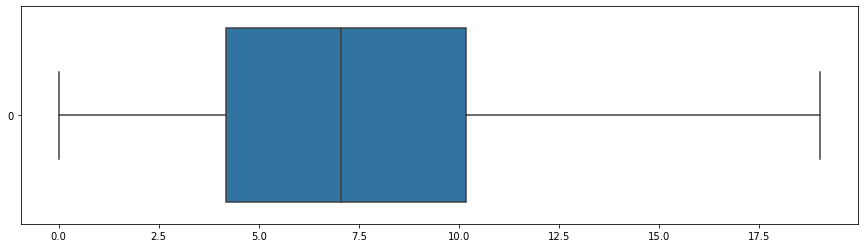

In [26]:
dflimpo = df.drop(index=outlier)
display(dflimpo)
plt.figure(figsize=(15, 4))
sns.boxplot(data=dflimpo['Velocidade do Vento (m/s)'], orient='h')
plt.show()